In [1]:
import numpy as np
import pandas as pd

from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6
from Functions_ImportData import import_BC_NOAA_NEX_GDDP_CMIP6
from Functions_ImportData import import_BC_Gorongosa_NEX_GDDP_CMIP6
from Functions_ImportData import add_year_month_season

from Potential_evapostranspiration_function import PET

Objectif: find the number of cumulative days per year with positive net precipitation (Pr - E)

# Project information that could be useful

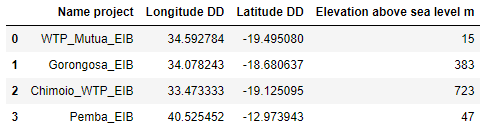

# Functions

In [2]:
def treat_data_Gorongosa_model(df):
    df = df[df['Name project']=='Gorongosa_EIB']
    df = df[df['Model']!='NESM3']
    df = df[df['Model']!='CMCC-CM2-SR5']
    df = df[df['Model']!='TaiESM1']
    return df

In [3]:
def change_date_format(date):
    d=date.split('-')
    date = d[2]+'-'+d[1]+'-'+d[0]
    return date

# Evapotranspiration at Gorongosa

#### needed parameters

Air temperature in degrees, normal, max and min

Downwelling short Rs in MJ/(m^2.day)

For calculation of Rnl (net longwave radiaiton, used for calculation of net radiation), need to know lat and month for the calculation to calculate Ra

Wind at 2 m [m/s], height where measurement taken is approx 10 m

Mean relative humidity in %

## Import data
Pr, temperature data will be bias corrected. 
Rs, RH, Wind are not bias corrected

In [4]:
df_pr_BC_NOAA_NEX_GDDP_CMIP6_past = import_BC_NOAA_NEX_GDDP_CMIP6('pr',1970,2014,EmplacementStationNOAA='no',resolution ='day')

In [5]:
df_pr_BC_NOAA_NEX_GDDP_CMIP6_past_gorongosa = treat_data_Gorongosa_model(df_pr_BC_NOAA_NEX_GDDP_CMIP6_past)

In [6]:
df_pr_BC_NOAA_NEX_GDDP_CMIP6_future = import_BC_NOAA_NEX_GDDP_CMIP6('pr',2030,2065,EmplacementStationNOAA='no',resolution ='day')

In [7]:
df_pr_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa = treat_data_Gorongosa_model(df_pr_BC_NOAA_NEX_GDDP_CMIP6_future)

In [8]:
df_tas_BC_NOAA_NEX_GDDP_CMIP6_past = import_BC_NOAA_NEX_GDDP_CMIP6('tas',1970,2014,EmplacementStationNOAA='no',resolution ='day')

In [9]:
df_tas_BC_NOAA_NEX_GDDP_CMIP6_past_gorongosa = treat_data_Gorongosa_model(df_tas_BC_NOAA_NEX_GDDP_CMIP6_past)

In [10]:
df_tas_BC_NOAA_NEX_GDDP_CMIP6_future = import_BC_NOAA_NEX_GDDP_CMIP6('tas',2030,2065,EmplacementStationNOAA='no',resolution ='day')

In [11]:
df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa = treat_data_Gorongosa_model(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future)

In [12]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_past = import_BC_NOAA_NEX_GDDP_CMIP6('tasmin',1970,2014,EmplacementStationNOAA='no',resolution ='day')

In [13]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_past_gorongosa = treat_data_Gorongosa_model(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_past)

In [14]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future = import_BC_NOAA_NEX_GDDP_CMIP6('tasmin',2030,2065,EmplacementStationNOAA='no',resolution ='day')

In [15]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future

,Date,Daily Minimum Near-Surface Air Temperature °C,Name project,Experiment,Model,Year,Month,Season
0,2030-01-01,22.029268,Chimoio_WTP_EIB,ssp126,CMCC-ESM2,2030,Jan,Humid
1,2030-01-02,22.771426,Chimoio_WTP_EIB,ssp126,CMCC-ESM2,2030,Jan,Humid
2,2030-01-03,21.293142,Chimoio_WTP_EIB,ssp126,CMCC-ESM2,2030,Jan,Humid
3,2030-01-04,20.440858,Chimoio_WTP_EIB,ssp126,CMCC-ESM2,2030,Jan,Humid
4,2030-01-05,20.455193,Chimoio_WTP_EIB,ssp126,CMCC-ESM2,2030,Jan,Humid
...,...,...,...,...,...,...,...,...
2310579,2065-12-27,27.859478,WTP_Mutua_EIB,ssp245,BCC-CSM2-MR,2065,Dec,Humid
2310580,2065-12-28,29.396100,WTP_Mutua_EIB,ssp245,BCC-CSM2-MR,2065,Dec,Humid
2310581,2065-12-29,28.590368,WTP_Mutua_EIB,ssp245,BCC-CSM2-MR,2065,Dec,Humid
2310582,2065-12-30,27.320952,WTP_Mutua_EIB,ssp245,BCC-CSM2-MR,2065,Dec,Humid


In [16]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa = treat_data_Gorongosa_model(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future)

In [17]:
df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_past = import_BC_NOAA_NEX_GDDP_CMIP6('tasmax',1970,2014,EmplacementStationNOAA='no',resolution ='day')

In [18]:
df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_past_gorongosa = treat_data_Gorongosa_model(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_past)

In [19]:
df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future = import_BC_NOAA_NEX_GDDP_CMIP6('tasmax',2030,2065,EmplacementStationNOAA='no',resolution ='day')

In [20]:
df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa = treat_data_Gorongosa_model(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future)

In [21]:
df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa

,Date,Daily Maximum Near-Surface Air Temperature °C,Name project,Experiment,Model,Year,Month,Season
1892808,2030-01-01,29.825729,Gorongosa_EIB,ssp245,ACCESS-CM2,2030,Jan,Humid
1892809,2030-01-02,30.163790,Gorongosa_EIB,ssp245,ACCESS-CM2,2030,Jan,Humid
1892810,2030-01-03,31.931390,Gorongosa_EIB,ssp245,ACCESS-CM2,2030,Jan,Humid
1892811,2030-01-04,30.706314,Gorongosa_EIB,ssp245,ACCESS-CM2,2030,Jan,Humid
1892812,2030-01-05,30.480226,Gorongosa_EIB,ssp245,ACCESS-CM2,2030,Jan,Humid
...,...,...,...,...,...,...,...,...
2523739,2065-12-27,34.339382,Gorongosa_EIB,ssp370,MIROC6,2065,Dec,Humid
2523740,2065-12-28,34.341650,Gorongosa_EIB,ssp370,MIROC6,2065,Dec,Humid
2523741,2065-12-29,34.802549,Gorongosa_EIB,ssp370,MIROC6,2065,Dec,Humid
2523742,2065-12-30,35.585190,Gorongosa_EIB,ssp370,MIROC6,2065,Dec,Humid


In [ ]:
Rs = import_treat_modeled_NEX_GDDP_CMIP6('rsds', 'MJ.m-2.day-1','day',1950,2100)

In [ ]:
Rs_NEX_GDDP_CMIP6_gorongosa#.drop(['Year','Month','Season'],axis=1)

In [ ]:
#Rs_NEX_GDDP_CMIP6_gorongosa = treat_data_Gorongosa_model(Rs)

In [ ]:
Rs_NEX_GDDP_CMIP6_gorongosa = Rs[Rs['Name project']=='WTP_Mutua_EIB']
Rs_NEX_GDDP_CMIP6_gorongosa = Rs_NEX_GDDP_CMIP6_gorongosa[Rs_NEX_GDDP_CMIP6_gorongosa['Model']!='NESM3']
Rs_NEX_GDDP_CMIP6_gorongosa = Rs_NEX_GDDP_CMIP6_gorongosa[Rs_NEX_GDDP_CMIP6_gorongosa['Model']!='CMCC-CM2-SR5']
Rs_NEX_GDDP_CMIP6_gorongosa = Rs_NEX_GDDP_CMIP6_gorongosa[Rs_NEX_GDDP_CMIP6_gorongosa['Model']!='TaiESM1']

In [ ]:
Rs_NEX_GDDP_CMIP6_gorongosa = add_year_month_season(Rs_NEX_GDDP_CMIP6_gorongosa.drop(['Year','Month','Season'],axis=1),'Date')

In [ ]:
Rs_NEX_GDDP_CMIP6_past_gorongosa = Rs_NEX_GDDP_CMIP6_gorongosa[Rs_NEX_GDDP_CMIP6_gorongosa['Year'].between(1970,2014)]

In [ ]:
Rs_NEX_GDDP_CMIP6_future_gorongosa = Rs_NEX_GDDP_CMIP6_gorongosa[Rs_NEX_GDDP_CMIP6_gorongosa['Year'].between(2030,2065)]

In [ ]:
Rs_NEX_GDDP_CMIP6_future_gorongosa[['Date']]=Rs_NEX_GDDP_CMIP6_future_gorongosa[['Date']].applymap(change_date_format)

In [ ]:
Rs_NEX_GDDP_CMIP6_future_gorongosa

In [22]:
RH = import_treat_modeled_NEX_GDDP_CMIP6('hurs', '%','day',1950,2100)

In [23]:
RH_NEX_GDDP_CMIP6_gorongosa = treat_data_Gorongosa_model(RH)

In [24]:
RH_NEX_GDDP_CMIP6_past_gorongosa = RH_NEX_GDDP_CMIP6_gorongosa[RH_NEX_GDDP_CMIP6_gorongosa['Year'].between(1970,2014)]

In [25]:
RH_NEX_GDDP_CMIP6_future_gorongosa = RH_NEX_GDDP_CMIP6_gorongosa[RH_NEX_GDDP_CMIP6_gorongosa['Year'].between(2030,2065)]

In [26]:
RH_NEX_GDDP_CMIP6_future_gorongosa[['Date']]=RH_NEX_GDDP_CMIP6_future_gorongosa[['Date']].applymap(change_date_format)

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_10252\1867960232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NEX_GDDP_CMIP6_future_gorongosa[['Date']]=RH_NEX_GDDP_CMIP6_future_gorongosa[['Date']].applymap(change_date_format)


In [27]:
Wind_10 = import_treat_modeled_NEX_GDDP_CMIP6('sfcWind', 'm_s-1','day',1950,2100)

In [28]:
def convert_wind_height(U,z=10): # 10 is the distance above the ground where the wind was measured
    U_2 = U*(4.87/(np.log((67.8*z)-5.42)))
    return U_2

In [29]:
Wind_2 = Wind_10.copy(deep=True) # convert wind to have at the height of 2

In [30]:
Wind_2[['Daily-Mean Near-Surface Wind Speed m_s-1']]=Wind_10[['Daily-Mean Near-Surface Wind Speed m_s-1']].applymap(convert_wind_height)

In [31]:
Wind_2_NEX_GDDP_CMIP6_gorongosa = treat_data_Gorongosa_model(Wind_2)

In [32]:
Wind_2_NEX_GDDP_CMIP6_past_gorongosa = Wind_2_NEX_GDDP_CMIP6_gorongosa[Wind_2_NEX_GDDP_CMIP6_gorongosa['Year'].between(1970,2014)]

In [33]:
Wind_2_NEX_GDDP_CMIP6_future_gorongosa = Wind_2_NEX_GDDP_CMIP6_gorongosa[Wind_2_NEX_GDDP_CMIP6_gorongosa['Year'].between(2030,2065)]

In [34]:
Wind_2_NEX_GDDP_CMIP6_future_gorongosa[['Date']]=Wind_2_NEX_GDDP_CMIP6_future_gorongosa[['Date']].applymap(change_date_format)

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_10252\3332290068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wind_2_NEX_GDDP_CMIP6_future_gorongosa[['Date']]=Wind_2_NEX_GDDP_CMIP6_future_gorongosa[['Date']].applymap(change_date_format)


In [35]:
Wind_2_NEX_GDDP_CMIP6_future_gorongosa

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily-Mean Near-Surface Wind Speed m_s-1,Year,Month,Season
2602369,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.625,34.125,2030-01-01,1.290142,2030,Jan,Humid
2602370,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.625,34.125,2030-01-02,1.406987,2030,Jan,Humid
2602371,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.625,34.125,2030-01-03,1.158303,2030,Jan,Humid
2602372,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.625,34.125,2030-01-04,1.720645,2030,Jan,Humid
2602373,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.625,34.125,2030-01-05,1.945903,2030,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
4437351,Gorongosa_EIB,ssp370,NorESM2-MM,-18.625,34.125,2065-12-27,NaN,2065,Dec,Humid
4437352,Gorongosa_EIB,ssp370,NorESM2-MM,-18.625,34.125,2065-12-28,NaN,2065,Dec,Humid
4437353,Gorongosa_EIB,ssp370,NorESM2-MM,-18.625,34.125,2065-12-29,NaN,2065,Dec,Humid
4437354,Gorongosa_EIB,ssp370,NorESM2-MM,-18.625,34.125,2065-12-30,NaN,2065,Dec,Humid


### Data to calculate the PET

### Precipitation data

##  Dataframe to record the PET
Duplicate the one with pr, put nan in it.
Need to take in account changing month and lat

In [ ]:
# future

In [36]:
PET_future_gorongosa = df_pr_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.copy(deep=True)

In [37]:
PET_future_gorongosa.rename(columns={'Mean of the daily precipitation rate mm_per_day':'Potential evapotranspiration kg_m2_day-1'},inplace=True)

In [38]:
PET_future_gorongosa[['Potential evapotranspiration kg_m2_day-1']] = np.nan

In [39]:
date = '2030-01-01'
model = 'MRI-ESM2-0'
ssp='ssp245'

In [ ]:
PET_future_gorongosa.loc[(PET_future_gorongosa['Date']==date)&(PET_future_gorongosa['Model']==model)&(PET_future_gorongosa['Experiment']==ssp),'Potential evapotranspiration kg_m2_day-1'] = np.nan

In [ ]:
PET_future_gorongosa.loc[(PET_future_gorongosa['Date']==date)&(PET_future_gorongosa['Model']==model)&(PET_future_gorongosa['Experiment']==ssp),'Potential evapotranspiration kg_m2_day-1'] 

In [ ]:
PET_future_gorongosa

In [ ]:
PET_future_gorongosa

In [40]:
lat = -18.680637 # latitude of the project 'Gorongosa_EIB'
z_station_elevation = 383 # 383 is the elevation above sea level [m] of Gorongosa

In [ ]:
for ssp in list(set(PET_future_gorongosa['Experiment'])):
    for model in list(set(PET_future_gorongosa['Model'])):
        for date in list(set(PET_future_gorongosa['Date'])):
            # what are the values of the parameters for the ssp, model and date precised ?
            T = df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            T_max = df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            T_min = df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            Rs_ = Rs_NEX_GDDP_CMIP6_future_gorongosa.loc[(Rs_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(Rs_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(Rs_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            RH_mean = RH_NEX_GDDP_CMIP6_future_gorongosa.loc[(RH_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(RH_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(RH_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            U_2 = Wind_2_NEX_GDDP_CMIP6_future_gorongosa.loc[(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            
            month = df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.at[df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Month']            
            # calculate value of PET
            PET(T,T_max,T_min,Rs_,RH_mean,U_2,z_station_elevation,lat,month)

In [ ]:
list(set(PET_future_gorongosa['Date']))

In [ ]:
Wind_2_NEX_GDDP_CMIP6_future_gorongosa

In [ ]:
T = df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp),'Daily Near-Surface Air Temperature °C'].values
            # calculate value of PET

In [ ]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa

In [45]:
T = df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Daily Near-Surface Air Temperature °C']
T_max = df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tasmax_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Daily Maximum Near-Surface Air Temperature °C']
T_min = df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.loc[df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Daily Minimum Near-Surface Air Temperature °C']
#Rs_ = Rs_NEX_GDDP_CMIP6_future_gorongosa.loc[Rs_NEX_GDDP_CMIP6_future_gorongosa[(Rs_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(Rs_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(Rs_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Daily-Mean Near-Surface Wind Speed MJ.m-2.day-1']
RH_mean = RH_NEX_GDDP_CMIP6_future_gorongosa.loc[RH_NEX_GDDP_CMIP6_future_gorongosa[(RH_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(RH_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(RH_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Near-Surface Relative Humidity %']
U_2 = Wind_2_NEX_GDDP_CMIP6_future_gorongosa.loc[Wind_2_NEX_GDDP_CMIP6_future_gorongosa[(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(Wind_2_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Daily-Mean Near-Surface Wind Speed m_s-1']
Rs_ = 28

In [ ]:
Rs_NEX_GDDP_CMIP6_future_gorongosa

In [ ]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)]#.index[0]

In [ ]:
df_tasmin_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa

In [ ]:
df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0]

In [42]:
month = df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa.at[df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa[(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Date']==date)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Model']==model)&(df_tas_BC_NOAA_NEX_GDDP_CMIP6_future_gorongosa['Experiment']==ssp)].index[0],'Month']

In [43]:
month

'Jan'

In [46]:
PET(T,T_max,T_min,Rs_,RH_mean,U_2,z_station_elevation,lat,month)

_delta 0.23049569770246406
R_n 27.019999861066562
_gamma 0.06728080497555754
U_2 1.0347380481637687
RH_mean 77.4313735961914
_lambda 2.4327301832304036


9.41739581822332

## Calculate Net Precipitation
duplicate Pr, put Nan in it, rename column
do a loop going in each ssp and model for Pr and E and register value.

## Number of consecutive days with Net Pr positive

go through each ssp, model
need to initialize with a value, look if next one are also positive
when meet a negative one, append number of consecutive days to a list

In [ ]:
# IN THE END, HAVE A list with numbers inside
# could be nice to have numbers per month, period over it is occuring